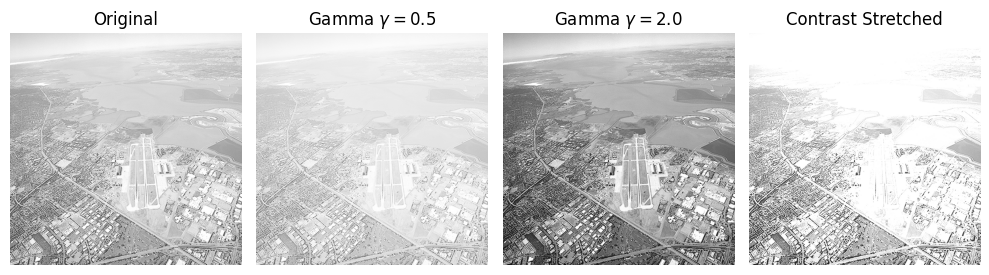

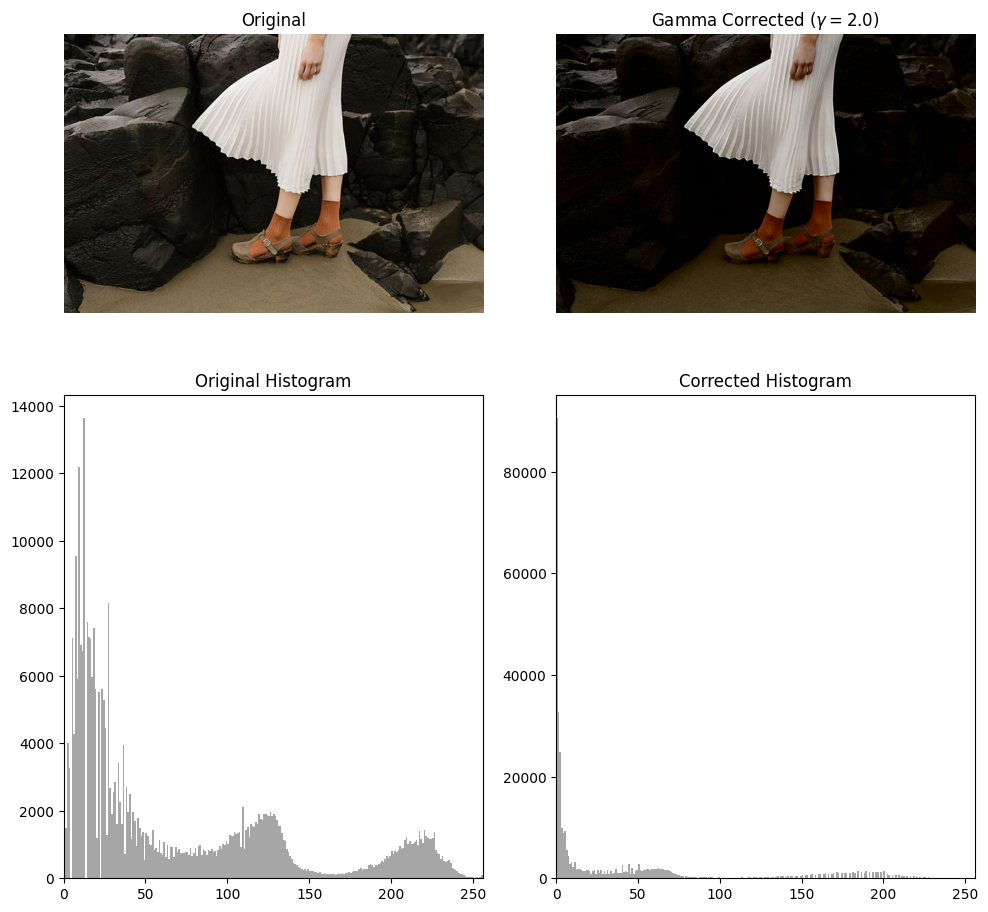

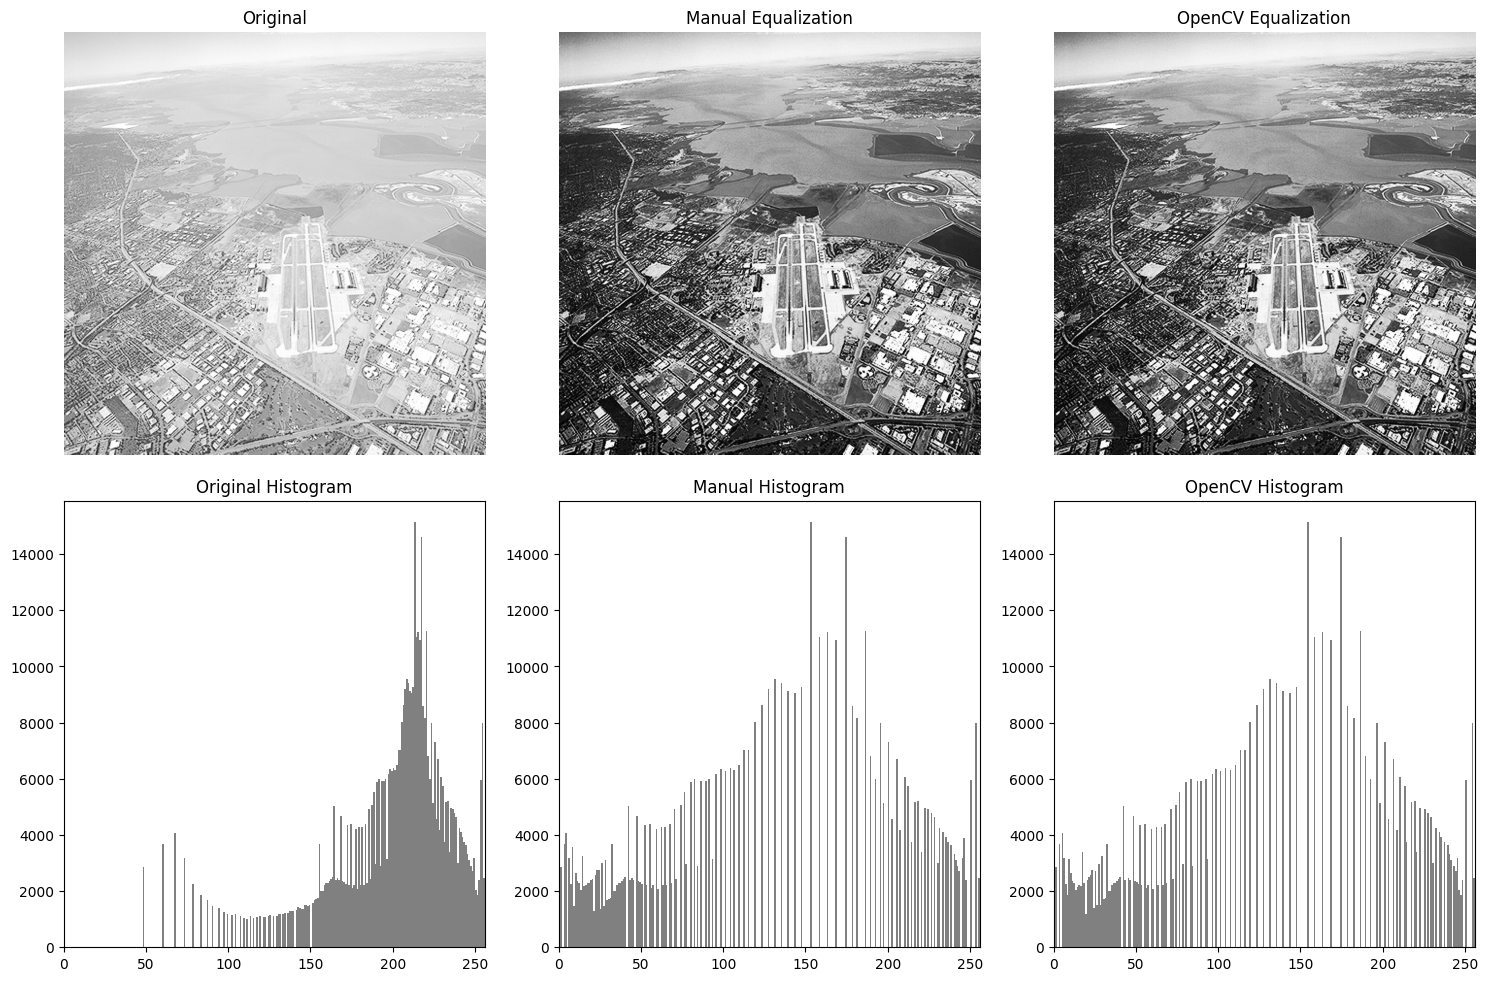

Otsu's threshold value: 101.0


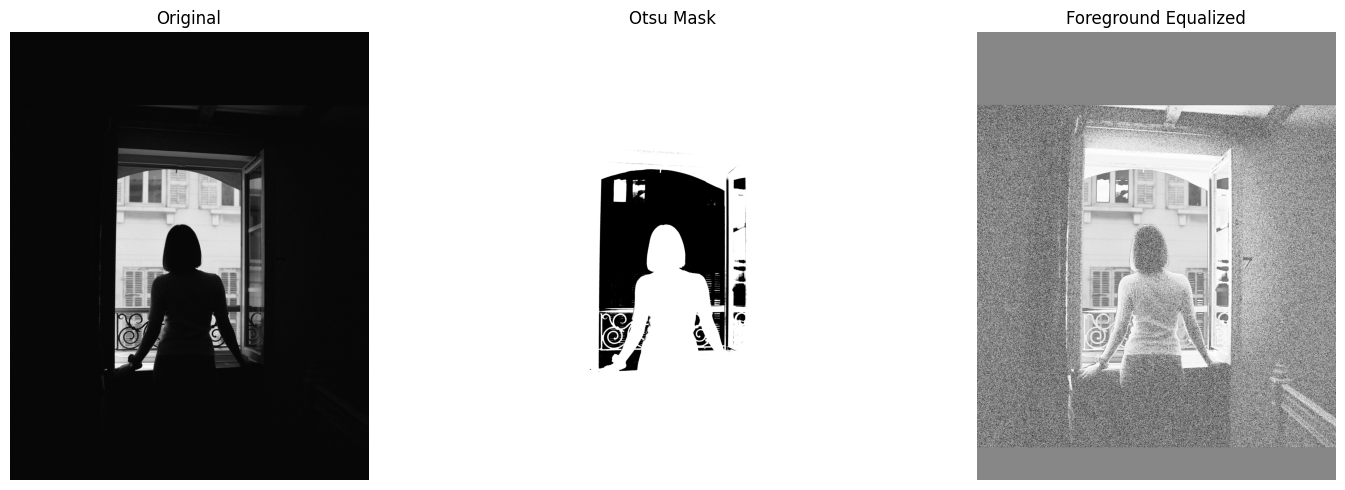

Computed 5x5 Gaussian Kernel (sigma=2):
 [[0.02325 0.03382 0.03833 0.03382 0.02325]
 [0.03382 0.04921 0.05577 0.04921 0.03382]
 [0.03833 0.05577 0.06319 0.05577 0.03833]
 [0.03382 0.04921 0.05577 0.04921 0.03382]
 [0.02325 0.03382 0.03833 0.03382 0.02325]]


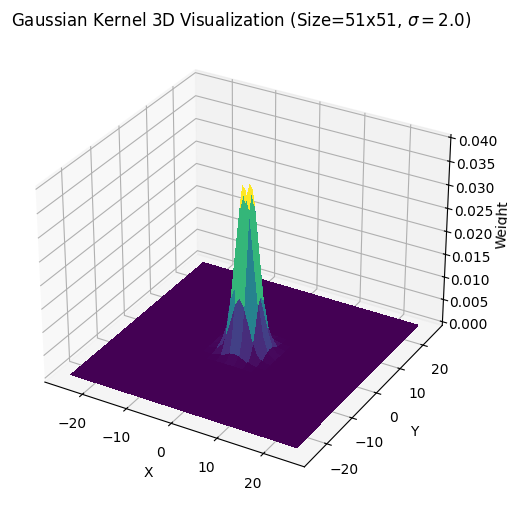

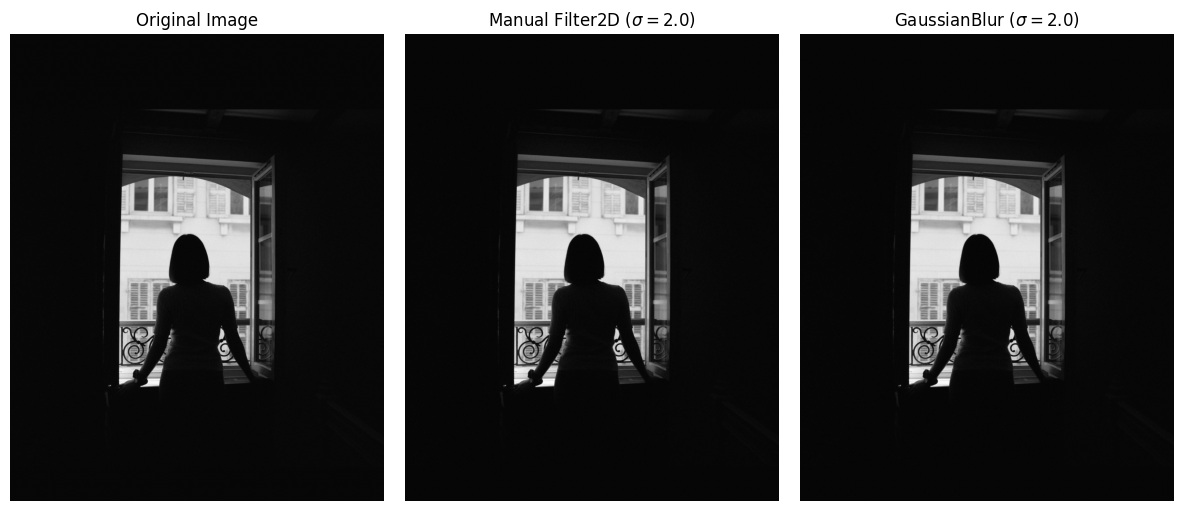

Kernel Dx (5x5):
 [[ 0.0073  0.0053  0.     -0.0053 -0.0073]
 [ 0.0106  0.0077  0.     -0.0077 -0.0106]
 [ 0.0121  0.0088  0.     -0.0088 -0.0121]
 [ 0.0106  0.0077  0.     -0.0077 -0.0106]
 [ 0.0073  0.0053  0.     -0.0053 -0.0073]]


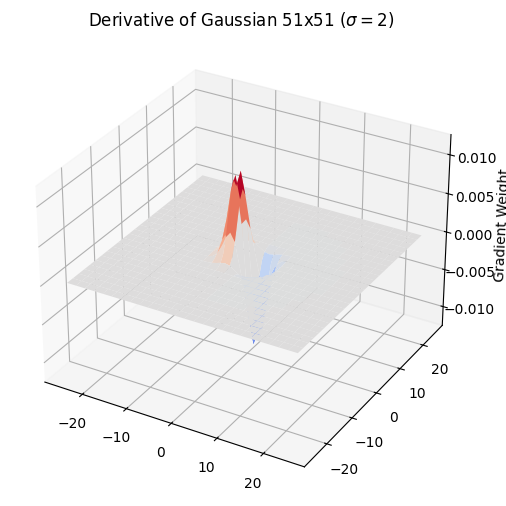

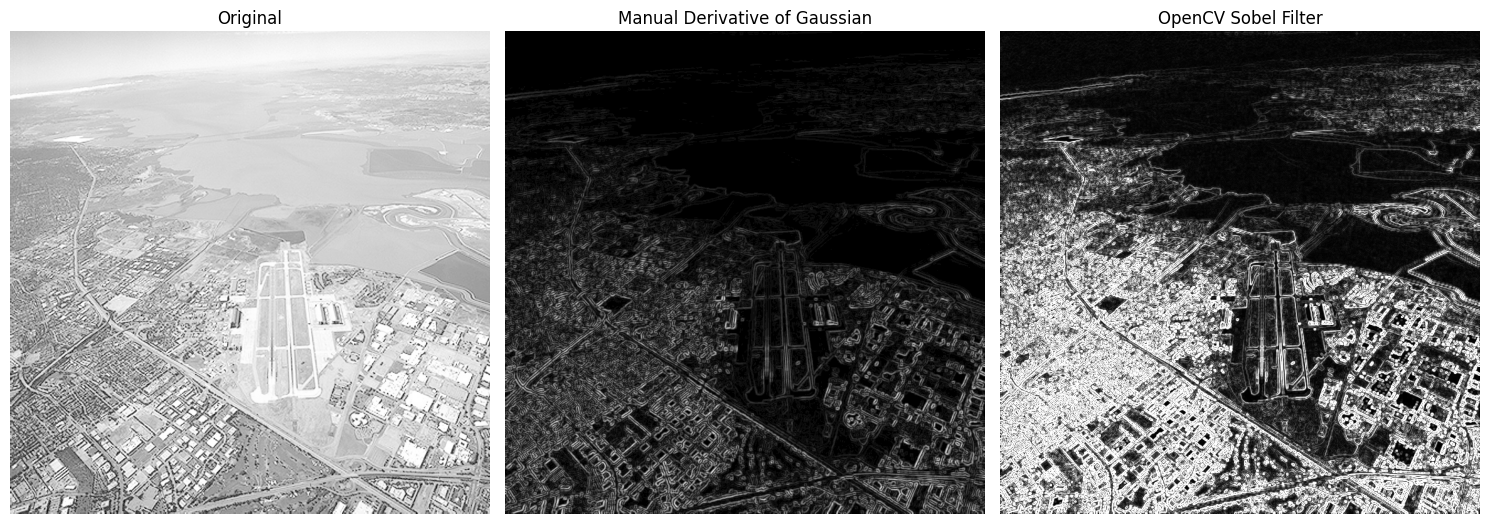

Comparison for im01.png
Nearest Neighbor SSD:   0.012058
Bilinear SSD:           0.010184
Winner: Bilinear\n
Comparison for im02.png
Nearest Neighbor SSD:   0.004190
Bilinear SSD:           0.002907
Winner: Bilinear\n
Comparison for im03.png
Nearest Neighbor SSD:   0.007107
Bilinear SSD:           0.005659
Winner: Bilinear\n
Comparison for taylor.jpg
Nearest Neighbor SSD:   0.005584
Bilinear SSD:           0.005230
Winner: Bilinear\n


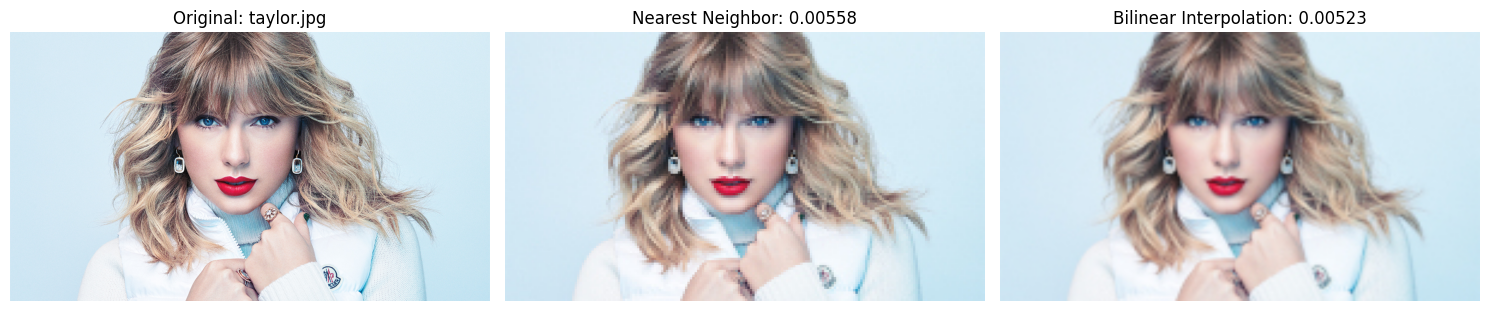

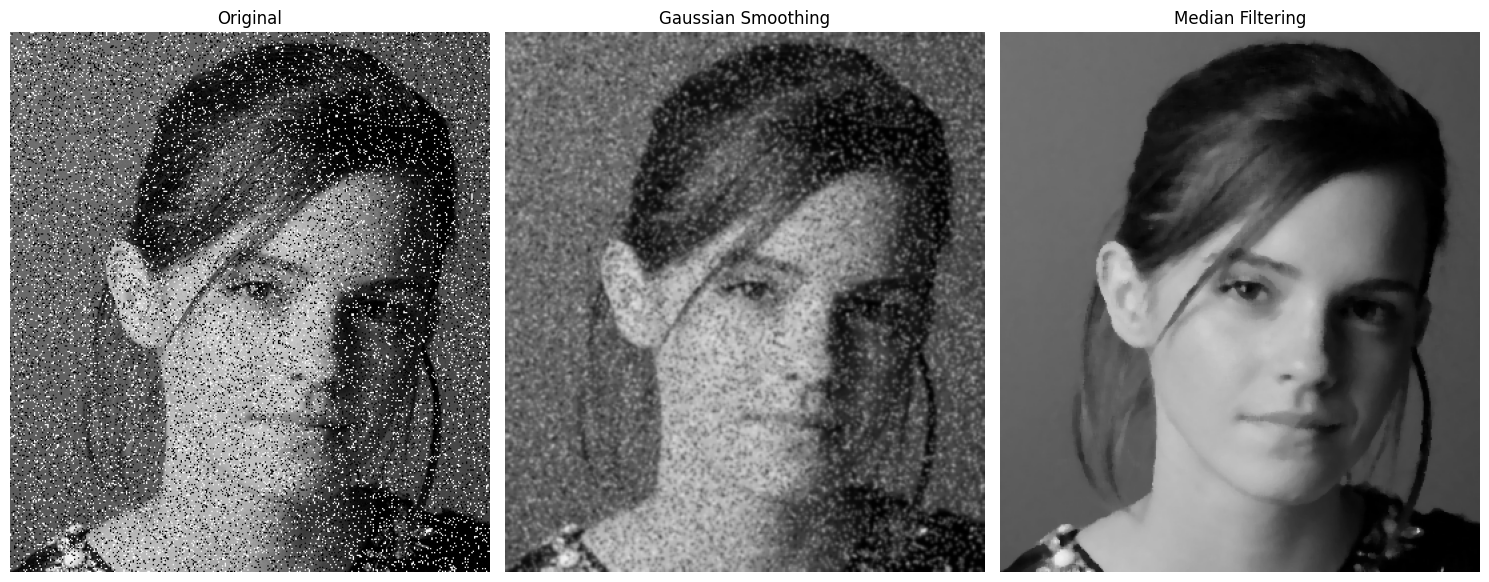

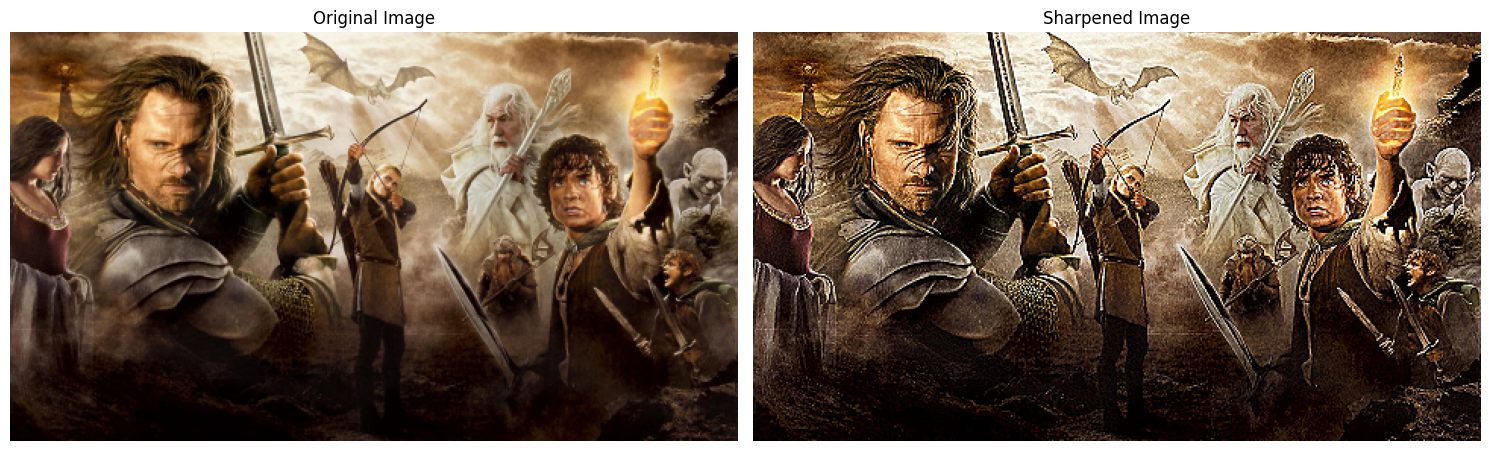

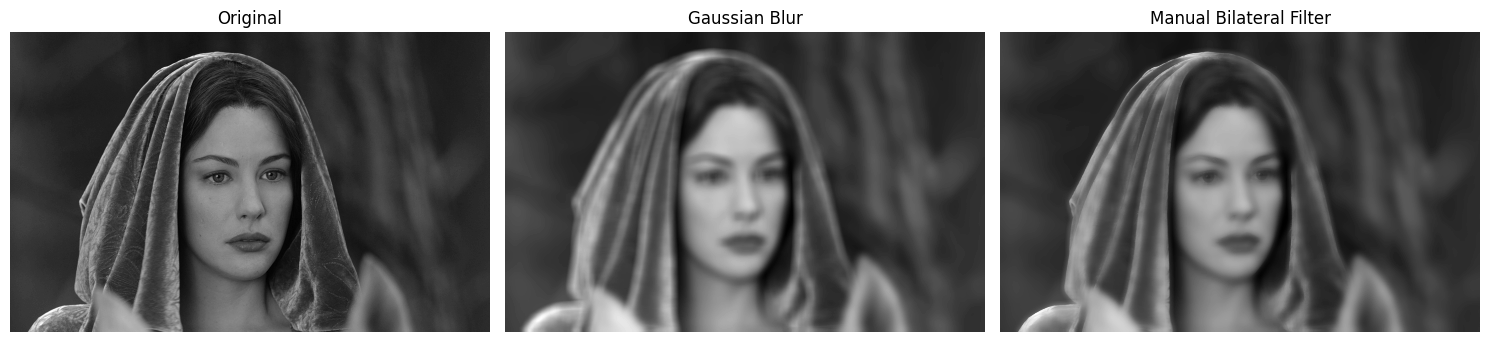

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### QUESTION 1 ###

f1 = cv.imread('Images/runway.png', cv.IMREAD_GRAYSCALE)

assert f1 is not None

plt.figure(figsize=(10, 10))

plt.subplot(1, 4, 1)
plt.imshow(f1, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

gamma_values = [0.5, 2.0]

for i, g in enumerate(gamma_values):
    table = np.array([((i / 255.0) ** g) * 255 for i in np.arange(0, 256)]).astype("uint8")

    h = cv.LUT(f1, table)
    cv.imwrite(rf'q1_gamma_{g}.png', h)
    
    plt.subplot(1, 4, i+2)
    plt.imshow(h, cmap='gray', vmin=0, vmax=255)
    plt.title(rf"Gamma $\gamma={g}$")
    plt.axis('off')


r1 = int(0.2 * 255)
r2 = int(0.8 * 255)

stretch_table = []

for i in range(256):
    if i < r1:
        val = 0
    elif i > r2:
        val = 255
    else:
        val = ((i - r1) / (r2 - r1)) * 255
    stretch_table.append(val)

stretch_table = np.array(stretch_table).astype('uint8')
contrast_img = cv.LUT(f1, stretch_table)

cv.imwrite('q1_contrast_stretch.png', contrast_img)

plt.subplot(1, 4, 4)
plt.imshow(contrast_img, cmap='gray', vmin=0, vmax=255)
plt.title(rf"Contrast Stretched")
plt.axis('off')

plt.tight_layout()
plt.show()


### QUESTION 2 ###

f2 = cv.imread('Images/highlights_and_shadows.jpg')
assert f2 is not None

f2_lab = cv.cvtColor(f2, cv.COLOR_BGR2Lab)
L, a, b = cv.split(f2_lab)

gamma_lab = 2.0

L_norm = L/255
L_corrected = (np.power(L_norm, gamma_lab) * 255).astype('uint8')

f2_lab_corrected = cv.cvtColor(cv.merge((L_corrected, a, b)), cv.COLOR_Lab2BGR)
cv.imwrite('q2_lab_corrected.png', f2_lab_corrected)

plt.figure(figsize=(10, 10))

#Original
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(f2, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

#Corrected
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(f2_lab_corrected, cv.COLOR_BGR2RGB))
plt.title(rf"Gamma Corrected ($\gamma={gamma_lab}$)")
plt.axis('off')

#Original Histogram
plt.subplot(2, 2, 3)
plt.hist(L.ravel(), bins=256, range=[0, 256], color = 'gray', alpha = 0.7)
plt.title("Original Histogram")
plt.xlim([0, 256])

#Corrected Histogram
plt.subplot(2, 2, 4)
plt.hist(L_corrected.ravel(), bins=256, range=[0, 256], color = 'gray', alpha = 0.7)
plt.title("Corrected Histogram")
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

### QUESTION 3 ###

f3 = cv.imread('Images/runway.png', cv.IMREAD_GRAYSCALE)
assert f3 is not None

hist, bins = np.histogram(f3.flatten(), 256, [0, 256])
pdf = hist / hist.sum()
cdf = pdf.cumsum()

lut = np.floor(255 * cdf).astype(np.uint8)

manual_eq = cv.LUT(f3, lut)

opencv_eq = cv.equalizeHist(f3)

cv.imwrite('q3_manual_equalized.png', manual_eq)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(f3, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(manual_eq, cmap='gray', vmin=0, vmax=255)
plt.title("Manual Equalization")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(opencv_eq, cmap='gray', vmin=0, vmax=255)
plt.title("OpenCV Equalization")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.hist(f3.ravel(), 256, range=[0, 256], color='gray')
plt.title("Original Histogram")
plt.xlim([0, 256])

plt.subplot(2, 3, 5)
plt.hist(manual_eq.ravel(), 256, range=[0, 256], color='gray')
plt.title("Manual Histogram")
plt.xlim([0, 256])

plt.subplot(2, 3, 6)
plt.hist(opencv_eq.ravel(), 256, range=[0, 256], color='gray')
plt.title("OpenCV Histogram")
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

### QUESTION 4 ###

f4 = cv.imread('Images/looking_out.jpg', cv.IMREAD_GRAYSCALE)
assert f4 is not None

threshold_value, mask = cv.threshold(f4, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
print(rf"Otsu's threshold value: {threshold_value}")

foreground_pixels = f4[mask == 255]
eq_pixels = cv.equalizeHist(foreground_pixels.reshape(-1, 1))

f4_equalized = f4.copy()
f4_equalized[mask == 255] = eq_pixels.flatten()

cv.imwrite('q4_masked_equalized.png', f4_equalized)

plt.figure(figsize=(15, 5))

#Original
plt.subplot(1, 3, 1)
plt.imshow(f4, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

#Mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
plt.title(rf"Otsu Mask")
plt.axis('off')

#Result
plt.subplot(1, 3, 3)
plt.imshow(f4_equalized, cmap='gray', vmin=0, vmax=255)
plt.title("Foreground Equalized")
plt.axis('off')

plt.tight_layout()
plt.show()

### QUESTION 5 ###

sigma = 2.0 
kernel_size = 5
offset = kernel_size // 2

x_range = np.arange(-offset, offset + 1)
y_range = np.arange(-offset, offset + 1)
x, y = np.meshgrid(x_range, y_range)

constant = 1/(2 * np.pi * sigma ** 2)
exponent = -(x**2 + y**2) / (2 * sigma ** 2)
kernel_5x5 = constant * np.exp(exponent)
kernel_5x5_normalized = kernel_5x5 / kernel_5x5.sum()

print("Computed 5x5 Gaussian Kernel (sigma=2):\n", np.round(kernel_5x5_normalized, 5))

viz_size = 51
viz_offset = viz_size // 2
vx_range = np.arange(-viz_offset, viz_offset + 1)
vy_range = np.arange(-viz_offset, viz_offset + 1)
vx, vy = np.meshgrid(vx_range, vy_range)

v_exponent = -(vx**2 + vy**2) / (2 * sigma ** 2)
kernel_viz = constant * np.exp(v_exponent)
kernel_viz_norm = kernel_viz / kernel_viz.sum()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(vx, vy, kernel_viz_norm, cmap='viridis', linewidth=0, antialiased=False)
ax.set_title(rf'Gaussian Kernel 3D Visualization (Size=51x51, $\sigma={sigma}$)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Weight')
plt.show()

f4 = cv.imread('Images/looking_out.jpg', cv.IMREAD_GRAYSCALE)
assert f4 is not None

manual_blur = cv.filter2D(f4, -1, kernel_5x5_normalized)
cv.imwrite('q5_manual_gaussian.png', manual_blur)

opencv_blur = cv.GaussianBlur(f4, (5, 5), sigmaX=sigma)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(f4, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(manual_blur, cmap='gray')
plt.title(rf"Manual Filter2D ($\sigma={sigma}$)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opencv_blur, cmap='gray')
plt.title(rf"GaussianBlur ($\sigma={sigma}$)")
plt.axis('off')

plt.tight_layout()
plt.show()

### QUESTION 6 ###

f6 = cv.imread('Images/runway.png', cv.IMREAD_GRAYSCALE)
assert f6 is not None

sigma = 2.0
x_range = np.arange(-2, 3)
y_range = np.arange(-2, 3)
x, y = np.meshgrid(x_range, y_range)

constant = 1 / (2 * np.pi * sigma**2)
exponent = -(x**2 + y**2) / (2 * sigma**2)
gaussian = constant * np.exp(exponent)

kernel_dx = (-x / sigma**2) * gaussian
kernel_dy = (-y / sigma**2) * gaussian
print("Kernel Dx (5x5):\n", np.round(kernel_dx, 4))

viz_range = np.arange(-25, 26)
vx, vy = np.meshgrid(viz_range, viz_range)
v_gaussian = constant * np.exp(-(vx**2 + vy**2) / (2 * sigma**2))
v_kernel_dx = (-vx / sigma**2) * v_gaussian

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(vx, vy, v_kernel_dx, cmap='coolwarm', linewidth=0, antialiased=True)
ax.set_title(rf'Derivative of Gaussian 51x51 ($\sigma=2$)')
ax.set_zlabel('Gradient Weight')
plt.show()

grad_x_manual = cv.filter2D(f6, cv.CV_64F, kernel_dx)
grad_y_manual = cv.filter2D(f6, cv.CV_64F, kernel_dy)
mag_manual = cv.magnitude(grad_x_manual, grad_y_manual)

mag_manual_disp = cv.convertScaleAbs(mag_manual)

grad_x_sobel = cv.Sobel(f6, cv.CV_64F, 1, 0, ksize=3)
grad_y_sobel = cv.Sobel(f6, cv.CV_64F, 0, 1, ksize=3)
mag_sobel = cv.magnitude(grad_x_sobel, grad_y_sobel)

mag_sobel_disp = cv.convertScaleAbs(mag_sobel)
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(f6, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mag_manual_disp, cmap='gray')
plt.title("Manual Derivative of Gaussian")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mag_sobel_disp, cmap='gray')
plt.title("OpenCV Sobel Filter")
plt.axis('off')

plt.tight_layout()
plt.show()

### QUESTION 7 ###

def compute(original, upscaled):
    if original.shape[:2] != upscaled.shape[:2]:
        upscaled = cv.resize(upscaled, (original.shape[1], original.shape[0]))

    orig_f = original.astype('float')
    upscaled_f = upscaled.astype('float')

    diff = orig_f - upscaled_f
    ssd = np.sum(diff ** 2)
    energy = np.sum(orig_f ** 2)
    return ssd / energy

def zoom_img(img, s, interpolation):
    new_dims = (int(img.shape[1] * s), int(img.shape[0] * s))
    if interpolation == 'nearest':
        return cv.resize(img, new_dims, interpolation=cv.INTER_NEAREST)
    elif interpolation == 'bilinear':
        return cv.resize(img, new_dims, interpolation=cv.INTER_LINEAR)
    else:
        return img

image_pairs = [
    ('Images/a1q5images/im01small.png', 'Images/a1q5images/im01.png'),
    ('Images/a1q5images/im02small.png', 'Images/a1q5images/im02.png'),
    ('Images/a1q5images/im03small.png', 'Images/a1q5images/im03.png'),
    ('Images/a1q5images/taylor_small.jpg', 'Images/a1q5images/taylor.jpg')
]

plt.figure(figsize=(15, 12))

for i, (path_small, path_large) in enumerate(image_pairs):
    
    img_small = cv.imread(path_small)
    img_large = cv.imread(path_large)
    
    assert img_small is not None
    assert img_large is not None

    s = img_large.shape[1] / img_small.shape[1]
    
    zoom_nn = zoom_img(img_small, s, 'nearest')
    zoom_bl = zoom_img(img_small, s, 'bilinear')
    
    ssd_nn = compute(img_large, zoom_nn)
    ssd_bl = compute(img_large, zoom_bl)

    file_name = path_large.split('/')[-1]
    print(rf"Comparison for {file_name}")
    print(rf"Nearest Neighbor SSD:   {ssd_nn:.6f}")
    print(rf"Bilinear SSD:           {ssd_bl:.6f}")
    print(rf"Winner: {'Bilinear' if ssd_bl < ssd_nn else 'Nearest Neighbor'}\n")

    if i == 3: 
        show_orig = cv.cvtColor(img_large, cv.COLOR_BGR2RGB)
        show_nn = cv.cvtColor(zoom_nn, cv.COLOR_BGR2RGB)
        show_bl = cv.cvtColor(zoom_bl, cv.COLOR_BGR2RGB)
        
        plt.subplot(1, 3, 1)
        plt.imshow(show_orig)
        plt.title(f"Original: {file_name}")
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.imshow(show_nn)
        plt.title(f"Nearest Neighbor: {ssd_nn:.5f}")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(show_bl)
        plt.title(f"Bilinear Interpolation: {ssd_bl:.5f}")
        plt.axis('off')

plt.tight_layout()
plt.show()

### QUESTION 8 ###

f8 = cv.imread('Images/emma_salt_pepper.jpg') 
assert f8 is not None

gaussian_result = cv.GaussianBlur(f8, (5, 5), sigmaX=1)
median_result = cv.medianBlur(f8, 5)

cv.imwrite('q8_gaussian.png', gaussian_result)
cv.imwrite('q8_median.png', median_result)

plt.figure(figsize=(15, 6))

#Original
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(f8, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

#Gaussian
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(gaussian_result, cv.COLOR_BGR2RGB))
plt.title("Gaussian Smoothing")
plt.axis('off')

#Median
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(median_result, cv.COLOR_BGR2RGB))
plt.title("Median Filtering")
plt.axis('off')

plt.tight_layout()
plt.show()

### QUESTION 9 ###

f9 = cv.imread('Images/a1q5images/im01small.png')
assert f9 is not None

sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

sharpened_img = cv.filter2D(f9, -1, sharpen_kernel)

cv.imwrite('q9_sharpened.png', sharpened_img)
plt.figure(figsize=(15, 8))

show_orig = cv.cvtColor(f9, cv.COLOR_BGR2RGB)
show_sharp = cv.cvtColor(sharpened_img, cv.COLOR_BGR2RGB)

#Original
plt.subplot(1, 2, 1)
plt.imshow(show_orig)
plt.title("Original Image")
plt.axis('off')

#Sharpened
plt.subplot(1, 2, 2)
plt.imshow(show_sharp)
plt.title("Sharpened Image")
plt.axis('off')

plt.tight_layout()
plt.show()

### QUESTION 10 ###

def manual_bilateral_filter(image, diameter, sigma_s, sigma_r):

    h, w = image.shape
    output = np.zeros((h, w), dtype=np.float32)
    
    pad = diameter // 2
    image_padded = cv.copyMakeBorder(image, pad, pad, pad, pad, cv.BORDER_REFLECT).astype(np.float32)
    
    x, y = np.meshgrid(np.arange(-pad, pad + 1), np.arange(-pad, pad + 1))
    spatial_kernel = np.exp(-(x**2 + y**2) / (2 * sigma_s**2))
    
    for i in range(h):
        for j in range(w):

            roi = image_padded[i:i+diameter, j:j+diameter]
            center_val = roi[pad, pad]
            intensity_diff = roi - center_val
            range_kernel = np.exp(-(intensity_diff**2) / (2 * sigma_r**2))
            weights = spatial_kernel * range_kernel
            
            norm_factor = np.sum(weights)
            output[i, j] = np.sum(weights * roi) / norm_factor
            
    return np.clip(output, 0, 255).astype(np.uint8)

f10 = cv.imread('Images/a1q5images/im02small.png', cv.IMREAD_GRAYSCALE)
assert f10 is not None

d = 9
sigma_s = 75
sigma_r = 75

gaussian_blur = cv.GaussianBlur(f10, (d, d), sigmaX=sigma_s)

cv_bilateral = cv.bilateralFilter(f10, d, sigmaColor=sigma_r, sigmaSpace=sigma_s)

manual_bilateral = manual_bilateral_filter(f10, d, sigma_s, sigma_r)

cv.imwrite('q10_manual_bilateral.png', manual_bilateral)

plt.figure(figsize=(15, 6))

#Original
plt.subplot(1, 3, 1)
plt.imshow(f10, cmap='gray')
plt.title("Original")
plt.axis('off')

#Gaussian
plt.subplot(1, 3, 2)
plt.imshow(gaussian_blur, cmap='gray')
plt.title("Gaussian Blur")
plt.axis('off')

#Manual Bilateral
plt.subplot(1, 3, 3)
plt.imshow(manual_bilateral, cmap='gray')
plt.title("Manual Bilateral Filter")
plt.axis('off')

plt.tight_layout()
plt.show()


